# 일정시간 (ex. 앞 0.5초 ref 뒤 0.5 after 이런식으로 데이터 표시하기.)

In [114]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_6_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-25 14:36:35.729,0.574435,0.183280,0.255364,0.45687,0.258524,0
1,1,2022-07-25 14:36:35.729,0.574435,0.183280,0.255364,0.45687,0.258524,0
2,2,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.45687,0.258524,0
3,3,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.45687,0.258524,0
4,4,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.45687,0.258524,0
...,...,...,...,...,...,...,...,...
67231,67278,2022-07-25 14:40:58.293,0.694381,0.547711,0.564315,0.69349,0.654323,0
67232,67279,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.69349,0.654323,0
67233,67280,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.69349,0.654323,0
67234,67281,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.69349,0.654323,0


In [117]:
pd.options.display.float_format = '{:.6f}'.format
data = data.drop('Unnamed: 0', axis = 1)
data.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [116]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 7980,
 10799,
 13620,
 16437,
 19248,
 29747,
 32562,
 35376,
 38192,
 41005,
 51504,
 54321,
 57143,
 59962,
 62769,
 67236]

In [118]:
pd.options.display.float_format = '{:.6f}'.format


In [119]:
# 시간 간격 정해서 체크해주는거
data['temp'] = 0
start_idx = 0
end_idx = 0
# time_s = datetime.timedelta(days=14)
time_s = datetime.strptime('0:00:02.100000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.100000', "%H:%M:%S.%f")  #2초 #1.5
time_e = datetime.strptime('0:00:01.500000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.500000', "%H:%M:%S.%f")  #1초 #0.5

time_s_1 = datetime.strptime('0:00:01.300000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.100000', "%H:%M:%S.%f")  #2초 #1.5
time_e_1 = datetime.strptime('0:00:01.700000', "%H:%M:%S.%f")  - datetime.strptime('0:00:01.500000', "%H:%M:%S.%f")  #1초 #0.5
# time_delta로 맞춰줘야해서 
print(time_s, time_e)
print(time_s_1,time_e_1)
# time_s = datetime.strptime('0:00:01.000000', "%H:%M:%S.%f") # 200ms 만들기
# time_e = datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") # 200ms 만들기


for j in range(0, len(point)-1) :
    globals()['temp_idx_ref{}'.format(j)] = []
    globals()['temp_idx_after{}'.format(j)] = []
    for i in range(point[j-1], point[j]) : # stimulus time부터 앞으로 1.0~0.5s에 1 표시한거 즉, 자극 이전 레퍼런스 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = time_stimulus - time_data
        if time_interval > time_e_1 and time_interval < time_s_1 :
            data['temp'][i] = str(j) + 'ref'
            globals()['temp_idx_ref{}'.format(j)].append(i) # 각 인덱스 저장해주는 코드
        
    for i in range(point[j], point[j+1]) : # stimulus time부터 뒤로 0.5~1.0s에 2 표시한거 즉, 자극 이후 변화한 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = -(time_stimulus - time_data)
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'after'
#             print(i)
            globals()['temp_idx_after{}'.format(j)].append(i)
        
## 여기까지하면 1Sec after 마다 시작점, 끝나는 점 기록한 temp_idx_ref1~15,  temp_idx_after1~15가 생김.

0:00:02 0:00:01
0:00:01.200000 0:00:00.200000


C:\Users\hhz20\AppData\Local\Temp/ipykernel_3576/3050637415.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'after'
C:\Users\hhz20\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [124]:
# 일정 시간 잘라서 ref와 after 표시한거 파일로 저장
data.to_excel("./clean_dataset/clean_stimulus/session_6_clean_stimulus.xlsx")

# 1ref에 대한 히트맵

In [123]:
data

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,temp,beta/theta
0,2022-07-25 14:36:35.729,0.574435,0.183280,0.255364,0.456870,0.258524,0,0,1.767223
1,2022-07-25 14:36:35.729,0.574435,0.183280,0.255364,0.456870,0.258524,0,0,1.767223
2,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.456870,0.258524,0,0,1.767223
3,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.456870,0.258524,0,0,1.767223
4,2022-07-25 14:36:35.730,0.574435,0.183280,0.255364,0.456870,0.258524,0,0,1.767223
...,...,...,...,...,...,...,...,...,...
67231,2022-07-25 14:40:58.293,0.694381,0.547711,0.564315,0.693490,0.654323,0,0,1.059860
67232,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.693490,0.654323,0,0,1.059860
67233,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.693490,0.654323,0,0,1.059860
67234,2022-07-25 14:40:58.294,0.694381,0.547711,0.564315,0.693490,0.654323,0,0,1.059860


In [122]:
data['beta/theta'] = data['Beta_AF8']/data['Gamma_AF8']

In [89]:
ref1_btr = data[data['temp'] == '8ref'][['Alpha_AF8']].copy()

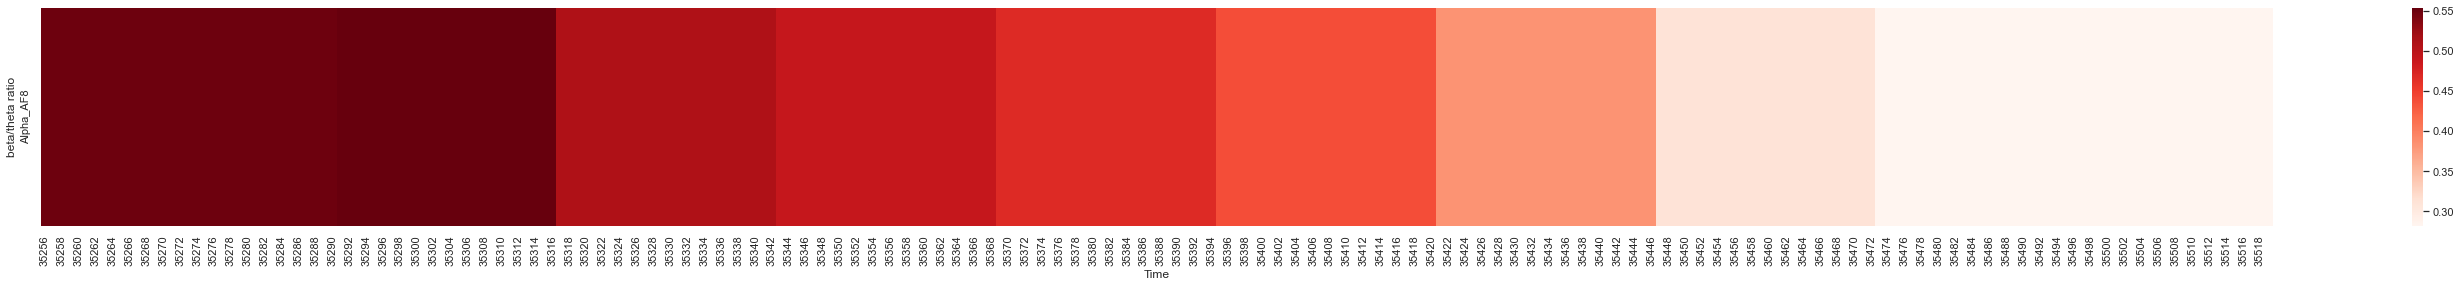

In [90]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(50,4)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(ref1_btr.transpose(), cmap='Reds', annot=False)
plt.xlabel("Time")
plt.ylabel("beta/theta ratio")

sfig = ax.get_figure()
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/trial15_beta.png',  orientation="landscape") # 수정
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/전체sum_alpha.png',  orientation="landscape") # 수정

# after-ref / ref 비율 확인하기 & after - ref 변화량 확인하기

In [125]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/clean_stimulus/session_6_clean_stimulus.xlsx') # stimulus 시점 표시된 clean data 가져오기.

In [46]:
# 빈 데이터프레임 생성. (ratio 저장할거)
df_ratio = pd.DataFrame(columns=['ratio_delta','ratio_theta','ratio_alpha','ratio_beta','ratio_gamma'])
for i in range(1, 16):
    ref_delta = data[data['temp'] == str(i)+'ref']['Delta_AF8'].mean()
    after_delta = data[data['temp'] == str(i)+'after']['Delta_AF8'].mean()
    ratio_delta = after_delta/ref_delta
    if ref_delta < 0 : 
        ratio_delta = -(ratio_delta)
    
    ref_theta = data[data['temp'] == str(i)+'ref']['Theta_AF8'].mean()
    after_theta = data[data['temp'] == str(i)+'after']['Theta_AF8'].mean()
    ratio_theta = (after_theta-ref_theta)/ref_theta
    if ref_theta < 0 : 
        ratio_theta = -(ratio_theta)
    
    ref_alpha = data[data['temp'] == str(i)+'ref']['Alpha_AF8'].mean()
    after_alpha = data[data['temp'] == str(i)+'after']['Alpha_AF8'].mean()
    ratio_alpha = (after_alpha-ref_alpha)/ref_alpha
    if ref_alpha < 0 : 
        ratio_alpha = -(ratio_alpha)
    
    ref_beta = data[data['temp'] == str(i)+'ref']['Beta_AF8'].mean()
    after_beta = data[data['temp'] == str(i)+'after']['Beta_AF8'].mean()
    ratio_beta = (after_beta-ref_beta)/ref_beta
    if ref_beta < 0 : 
        ratio_beta = -(ratio_beta)
    
    ref_gamma = data[data['temp'] == str(i)+'ref']['Gamma_AF8'].mean()
    after_gamma = data[data['temp'] == str(i)+'after']['Gamma_AF8'].mean()
    ratio_gamma = (after_gamma-ref_gamma)/ref_gamma
    if ref_gamma < 0 : 
        ratio_gamma = -(ratio_gamma)
    
    df_ratio.loc[i]=[ratio_delta,ratio_theta,ratio_alpha,ratio_beta, ratio_gamma]

In [47]:
pd.options.display.float_format = '{:.6f}'.format
df_ratio 

,ratio_delta,ratio_theta,ratio_alpha,ratio_beta,ratio_gamma
1,-0.418825,6.341075,0.047987,-0.014667,-0.086190
2,-0.670133,-0.196442,-0.185093,0.147466,-0.269593
3,0.051733,6.710650,1.832367,0.351759,0.130723
4,4.818885,4.828507,1.169966,0.068174,-0.215068
5,25.849575,0.220557,0.172773,0.077794,-0.711259
6,-0.524944,0.604496,0.428506,-0.255672,0.644297
7,-0.083604,-1.195538,0.189192,-0.138327,0.339950
8,5.217138,5.005864,0.306842,0.199173,0.095749
9,0.459568,1.223242,0.867170,0.387913,0.541119
10,-0.151685,-0.435542,-0.498577,-0.371306,-0.324111


In [179]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/clean_stimulus/session_5_clean_stimulus_new.xlsx') # stimulus 시점 표시된 clean data 가져오기.

In [180]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,beta/theta,temp
0,2022-07-22 16:47:05.270,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0
1,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0
2,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0
3,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0
4,2022-07-22 16:47:05.272,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0


In [181]:
data['theta/alpha'] = data['Theta_AF8']/data['Alpha_AF8']

In [182]:
data

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,beta/theta,temp,theta/alpha
0,2022-07-22 16:47:05.270,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0,1.030411
1,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0,1.030411
2,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0,1.030411
3,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0,1.030411
4,2022-07-22 16:47:05.272,0.653585,0.779724,0.756711,0.682772,0.091385,0,0.875659,0,1.030411
...,...,...,...,...,...,...,...,...,...,...
67255,2022-07-22 16:51:27.944,0.756288,0.337619,0.567640,0.647005,0.448585,0,1.916374,0,0.594778
67256,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0,1.916374,0,0.594778
67257,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0,1.916374,0,0.594778
67258,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0,1.916374,0,0.594778


In [183]:
# 빈 데이터프레임 생성. (ratio 저장할거)
df_ref = pd.DataFrame(columns=['ref_delta','ref_theta','ref_alpha','ref_beta','ref_gamma','ref_beta/theta', 'ref_theta/alpha'])
df_after = pd.DataFrame(columns=['after_delta','after_theta','after_alpha','after_beta','after_gamma','after_beta/theta', 'after_theta/alpha'])
for i in range(1, 16):
    ref_delta = data[data['temp'] == str(i)+'ref']['Delta_AF8'].mean()
    after_delta = data[data['temp'] == str(i)+'after']['Delta_AF8'].mean()
#     ratio_delta = after_delta/ref_delta
#     if ref_delta < 0 : 
#         ratio_delta = -(ratio_delta)
    
    ref_theta = data[data['temp'] == str(i)+'ref']['Theta_AF8'].mean()
    after_theta = data[data['temp'] == str(i)+'after']['Theta_AF8'].mean()
#     ratio_theta = (after_theta-ref_theta)/ref_theta
#     if ref_theta < 0 : 
#         ratio_theta = -(ratio_theta)
    
    ref_alpha = data[data['temp'] == str(i)+'ref']['Alpha_AF8'].mean()
    after_alpha = data[data['temp'] == str(i)+'after']['Alpha_AF8'].mean()
#     ratio_alpha = (after_alpha-ref_alpha)/ref_alpha
#     if ref_alpha < 0 : 
#         ratio_alpha = -(ratio_alpha)
    
    ref_beta = data[data['temp'] == str(i)+'ref']['Beta_AF8'].mean()
    after_beta = data[data['temp'] == str(i)+'after']['Beta_AF8'].mean()
#     ratio_beta = (after_beta-ref_beta)/ref_beta
#     if ref_beta < 0 : 
#         ratio_beta = -(ratio_beta)
    
    ref_gamma = data[data['temp'] == str(i)+'ref']['Gamma_AF8'].mean()
    after_gamma = data[data['temp'] == str(i)+'after']['Gamma_AF8'].mean()
    
    ref_BTR= data[data['temp'] == str(i)+'ref']['beta/theta'].mean()
    after_BTR = data[data['temp'] == str(i)+'after']['beta/theta'].mean()
    
    ref_TAR= data[data['temp'] == str(i)+'ref']['theta/alpha'].mean()
    after_TAR = data[data['temp'] == str(i)+'after']['theta/alpha'].mean()
#     ratio_gamma = (after_gamma-ref_gamma)/ref_gamma
#     if ref_gamma < 0 : 
#         ratio_gamma = -(ratio_gamma)
    
    df_ref.loc[i]=[ref_delta,ref_theta,ref_alpha,ref_beta,ref_gamma,ref_BTR, ref_TAR]
    df_after.loc[i]=[after_delta,after_theta,after_alpha,after_beta, after_gamma, after_BTR, after_TAR]
    

In [184]:
df_ref

,ref_delta,ref_theta,ref_alpha,ref_beta,ref_gamma,ref_beta/theta,ref_theta/alpha
1,0.247899,-0.210214,0.500574,0.677068,0.439332,-3.756953,-0.420594
2,0.579737,0.354517,0.536558,0.482276,0.429237,1.374195,0.661036
3,0.335610,0.046717,0.319850,0.551373,0.262302,14.328562,0.159858
4,0.030038,-0.169168,0.286801,0.614902,0.420819,-3.731229,-0.682337
5,0.030028,0.036976,0.523740,0.581455,0.595075,29.767980,0.071485
6,1.089469,0.518160,0.486629,0.896859,0.279687,1.730853,1.064796
7,0.728567,0.409975,0.391501,0.951924,0.755811,-29.939562,1.049856
8,0.183019,0.234224,0.433760,0.894194,0.657603,6.097757,0.649402
9,0.504039,0.181214,0.396984,0.619356,0.296381,3.534425,0.462209
10,0.126335,0.107974,0.664523,0.957272,0.761856,9.254028,0.162904


In [185]:
df_after

,after_delta,after_theta,after_alpha,after_beta,after_gamma,after_beta/theta,after_theta/alpha
1,0.246519,0.427973,0.544403,0.635769,0.332280,1.594577,0.781061
2,0.124421,0.352565,0.452168,0.533059,0.288734,1.517767,0.797681
3,0.377147,0.368846,0.611779,0.714296,0.429255,4.447042,0.601197
4,0.264131,0.241745,0.409940,0.583040,0.306185,2.423433,0.601878
5,0.677825,0.158256,0.480552,0.604647,0.148683,3.993970,0.333095
6,0.517559,0.831386,0.695152,0.667557,0.459888,0.807414,1.197216
7,0.540384,-0.136227,0.662494,0.726957,0.837745,-5.748684,-0.367083
8,0.320201,0.489212,0.729703,0.898769,0.657616,1.839483,0.670425
9,0.470442,0.305042,0.804712,0.951603,0.648654,3.216835,0.380745
10,0.164758,0.156039,0.418439,0.604318,0.538770,-61.009810,0.348413


In [186]:
df_after.columns=['delta','theta','alpha','beta','gamma','beta/theta','theta/alpha']

In [187]:
df_ref.columns=['delta','theta','alpha','beta','gamma','beta/theta','theta/alpha']

In [188]:
df_ratio = df_after/df_ref

In [189]:
df_ratio[['alpha','beta','gamma']]

,alpha,beta,gamma
1,1.087558,0.939003,0.756330
2,0.842720,1.105299,0.672668
3,1.912708,1.295485,1.636495
4,1.429351,0.948183,0.727592
5,0.917538,1.039886,0.249856
6,1.428506,0.744328,1.644297
7,1.692190,0.763672,1.108405
8,1.682274,1.005116,1.000020
9,2.027063,1.536440,2.188583
10,0.629684,0.631292,0.707181


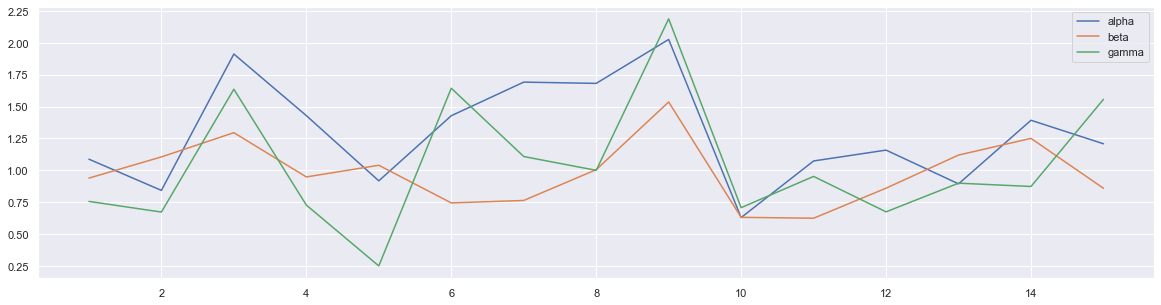

In [190]:
import matplotlib.pyplot as plt
# xticklabels=[1,2,3,4,5,6,7,8,9,0,]
plt.figure(figsize = (20,5))
plt.plot(df_ratio[['alpha','beta','gamma']])
plt.legend(('alpha','beta','gamma'))
plt.show()

No handles with labels found to put in legend.


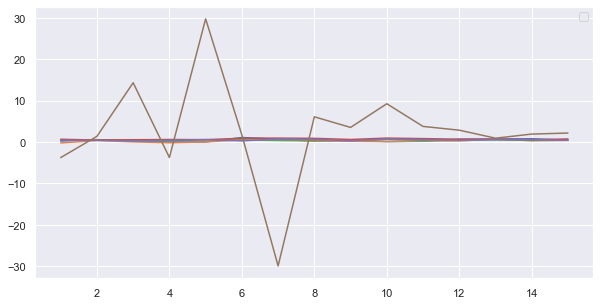

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(df_ref)
plt.legend()
plt.show()

In [24]:
# 비율 말고 변화량(증가값)으로 보기
# 빈 데이터프레임 생성.
df_increase = pd.DataFrame(columns=['increase_delta','increase_theta','increase_alpha','increase_beta','ratio_gamma'])

for i in range(1, 16):
    ref_delta = data[data['temp'] == str(i)+'ref']['Delta_AF8'].mean()
    after_delta = data[data['temp'] == str(i)+'after']['Delta_AF8'].mean()
    increase_delta = (after_delta-ref_delta)
    
    ref_theta = data[data['temp'] == str(i)+'ref']['Theta_AF8'].mean()
    after_theta = data[data['temp'] == str(i)+'after']['Theta_AF8'].mean()
    increase_theta = (after_theta-ref_theta)
    
    ref_alpha = data[data['temp'] == str(i)+'ref']['Alpha_AF8'].mean()
    after_alpha = data[data['temp'] == str(i)+'after']['Alpha_AF8'].mean()
    increase_alpha = (after_alpha-ref_alpha)
    
    ref_beta = data[data['temp'] == str(i)+'ref']['Beta_AF8'].mean()
    after_beta = data[data['temp'] == str(i)+'after']['Beta_AF8'].mean()
    increase_beta = (after_beta-ref_beta)
    
    ref_gamma = data[data['temp'] == str(i)+'ref']['Gamma_AF8'].mean()
    after_gamma = data[data['temp'] == str(i)+'after']['Gamma_AF8'].mean()
    increase_gamma = (after_gamma-ref_gamma)
    
    df_increase.loc[i]=[increase_delta,increase_theta,increase_alpha,increase_beta, increase_gamma]

In [25]:
pd.options.display.float_format = '{:.6f}'.format
df_increase

,increase_delta,increase_theta,increase_alpha,increase_beta,ratio_gamma
1,-0.369971,0.075125,-0.097232,0.035942,0.046018
2,-0.214721,0.027140,0.073332,0.017452,-0.061638
3,0.090214,0.082988,0.165876,0.114073,-0.074255
4,0.012938,0.220267,0.048859,0.141774,-0.044500
5,0.428554,-0.055828,-0.047800,0.107817,-0.136774
6,-0.518782,0.335397,0.126246,-0.273303,0.060357
7,0.339135,-0.652084,-0.403274,-0.002091,0.316025
8,-0.151615,0.212957,-0.013441,0.094553,0.022308
9,0.147202,0.253420,0.150618,0.088447,0.042259
10,-0.173232,-0.437967,-0.305390,-0.257411,-0.124314
